In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import bs4 as bs
import pickle
import requests
import mpld3
mpld3.enable_notebook()
%matplotlib inline

/home/harsh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
df_JPM=pd.read_csv('JPM1.csv')

In [3]:
df_JPM.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,SMA,SMA_100,EMA,Gain,Loss,Average_Gain,Average_Loss,Relative_Strength,RSI
2009,2009,2017-12-22,108.199997,108.459999,106.809998,107.449997,106.893158,14573400,104.662281,96.556956,104.457278,0.000000,0.430000,0.466428,0.373571,1.248565,55.527201
2010,2010,2017-12-26,107.199997,107.989998,106.400002,107.019997,106.465385,7403700,105.114426,96.706751,104.648526,0.200004,-0.000000,0.480714,0.317142,1.515767,60.250688
2011,2011,2017-12-27,106.669998,107.290001,106.669998,107.220001,106.664352,9496500,105.405908,96.847064,104.840509,0.570000,-0.000000,0.521428,0.295000,1.767555,63.867020
2012,2012,2017-12-28,107.400002,107.839996,107.160004,107.790001,107.231400,7440600,105.607856,96.989486,105.068213,0.000000,0.849999,0.427857,0.355714,1.202812,54.603476
2013,2013,2017-12-29,108.089996,108.279999,106.940002,106.940002,106.385803,8925700,105.728229,97.126815,105.193698,0.000000,-0.000000,0.427857,0.333571,1.282655,56.191368


In [19]:
df=pd.DataFrame(data=((df_JPM['Close']-df_JPM['Low'])-(df_JPM['High']-df_JPM['Low']))/(df_JPM['High']-df_JPM['Low']),
                columns=['MFM'])

In [22]:
df['MFV']=df['MFM']*df_JPM['Volume']

In [26]:
df_JPM['CMF']=df['MFV'].rolling(window=20).sum()/(df_JPM['Volume'].rolling(window=20).sum())

In [28]:
df_JPM.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,SMA,SMA_100,EMA,Gain,Loss,Average_Gain,Average_Loss,Relative_Strength,RSI,CMF
2009,2009,2017-12-22,108.199997,108.459999,106.809998,107.449997,106.893158,14573400,104.662281,96.556956,104.457278,0.000000,0.430000,0.466428,0.373571,1.248565,55.527201,-0.541789
2010,2010,2017-12-26,107.199997,107.989998,106.400002,107.019997,106.465385,7403700,105.114426,96.706751,104.648526,0.200004,-0.000000,0.480714,0.317142,1.515767,60.250688,-0.524666
2011,2011,2017-12-27,106.669998,107.290001,106.669998,107.220001,106.664352,9496500,105.405908,96.847064,104.840509,0.570000,-0.000000,0.521428,0.295000,1.767555,63.867020,-0.535400
2012,2012,2017-12-28,107.400002,107.839996,107.160004,107.790001,107.231400,7440600,105.607856,96.989486,105.068213,0.000000,0.849999,0.427857,0.355714,1.202812,54.603476,-0.546378
2013,2013,2017-12-29,108.089996,108.279999,106.940002,106.940002,106.385803,8925700,105.728229,97.126815,105.193698,0.000000,-0.000000,0.427857,0.333571,1.282655,56.191368,-0.537847


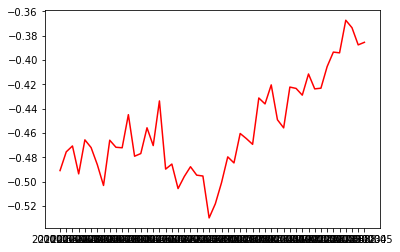

In [31]:
plt.plot(df_JPM['Date'][100:150],df_JPM['CMF'][100:150],'r')

In [32]:
df_JPM.to_csv('JPM1.csv')